# Exercise 2a: Plotting

## Aim: Learn to create plots with the inbuilt `.plot()` function

Find the teaching resources here: https://tutorial.xarray.dev/fundamentals/04.1_basic_plotting.html

### Issues Covered: 
- Creating and customising plots using the inbuilt xarray `.plot()` function
- Creating a time-series using `.sel()` and `.isel()` and plotting these.

## 1. Plotting

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [1]:
import xarray as xr
ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature = ds["temp"]

Q2. Try a simple `.plot()` on your temperature data array, to see what xarray does. Why has it done this?

(array([167948.,  74985.,  46325.,  32775.,  30391.,  26162.,  25805.,
         27845.,  21516.,    587.]),
 array([-1.79998779,  1.88496089,  5.56990957,  9.25485802, 12.93980694,
        16.62475586, 20.30970383, 23.9946537 , 27.67960167, 31.36455154,
        35.04949951]),
 <BarContainer object of 10 artists>)

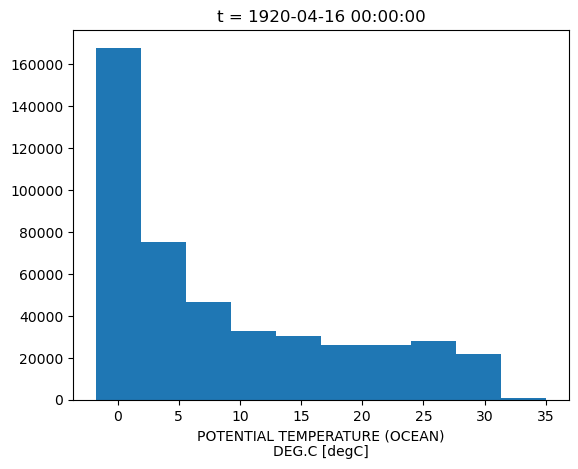

In [2]:
temperature.plot()

By default, when data is three-dimensional (as this data is) xarray will produce a simple histogram of all the data.
When the data has two dimensions, it will create a contour plot, and when the data has one dimension it will create a line plot.

Q3. Next, try the same with a 2-dimensional view of your dataset. Try selecting sea surface temperature values and plotting those.

In [3]:
surface = temperature.sel(depth=0, method='nearest')

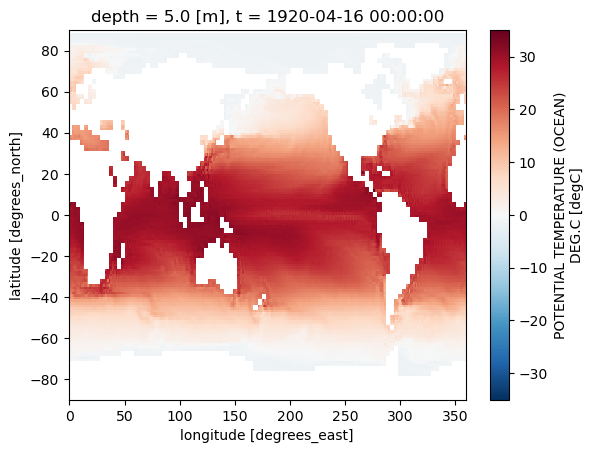

In [4]:
surface.plot()

Q4. Finally, create a depth profile from `temperature` by using `sel` to select data for the same latitude and longitude values (31,0).

Hint: The latitude value is `-50.625` and the longitude value is `0`. All 3 of these methods will return the same dataset.

In [5]:
temperature_prof = temperature.sel(latitude=-50.625, longitude=0)

Q5. Create a plot from this time series.

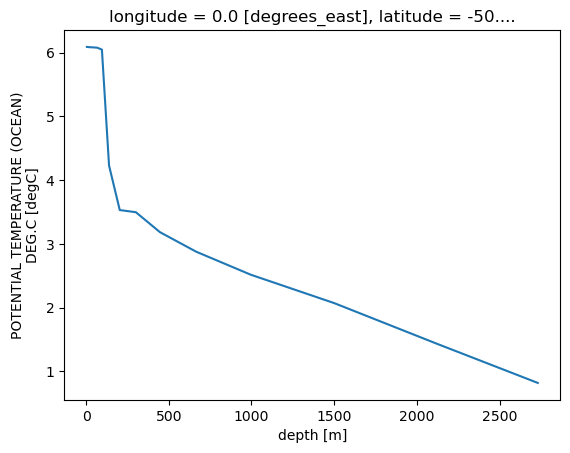

In [6]:
temperature_prof.plot()

Q6. Make the plot red with 'x' marking the points.

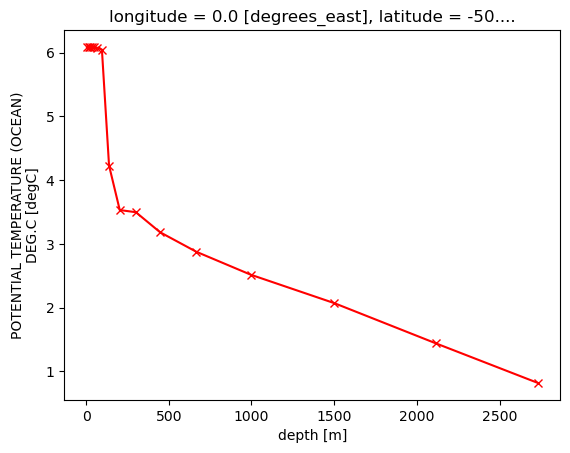

In [7]:
temperature_prof.plot(color='red', marker='x')

Q7. Create a time series plot comparing the temperature profile at three different grid cells:
 - lat = -50.625, lon = 0
 - lat = 0, lon = 200
 - lat = 0, lon = 320

Make sure each time series has a different colour and include a legend. As an extension, give them different linestyles too.
Hint: use `.sel` to index the lat and lon.

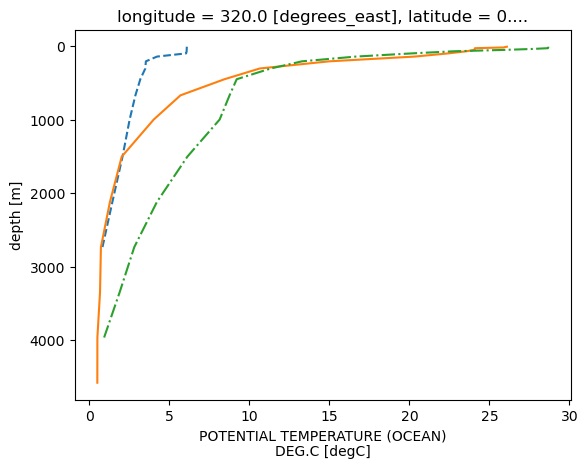

In [8]:
# Make some axes to share between all the plots.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Extract the time series for each location
temp_1 = temperature.sel(latitude=-50.625, longitude=0, )
temp_2 = temperature.sel(latitude=0, longitude=200, method='nearest')
temp_3 = temperature.sel(latitude=0, longitude=320, method='nearest')

# Plot the time series for each location
temp_1.plot(ax=ax, label="South Atlantic", linestyle='--', y='depth')
temp_2.plot(ax=ax, label="Mid Pacific", y='depth')
temp_3.plot(ax=ax, label="Mid Atlantic", linestyle='-.', y='depth')

# Oceanographers like depth to go downwards.
ax.invert_yaxis()

Q8. Let's plot some data in 2D. Use `sel` to select data for 200 meters below the surface.

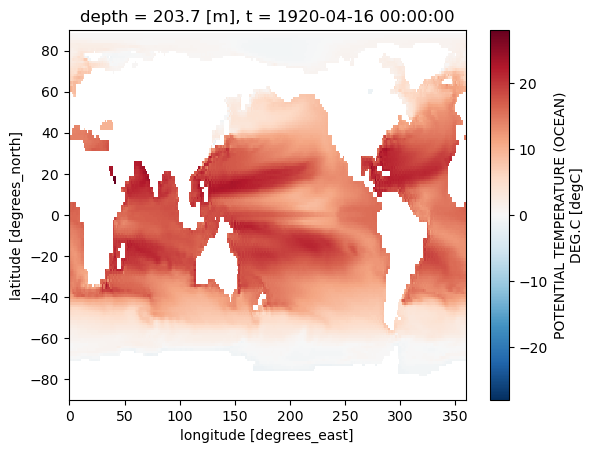

In [9]:
specific_time = temperature.sel(depth='200', method='nearest')
specific_time.plot()